# Introduction to the statistical characterisation of probability distributions

**Authors**: Andreas Kruff, Johann Schaible, Marcos Oliveira

**Version**: 11.05.2020

**Description**: This tutorial will help you to understand how to use the powerlaw package correctly to statistically characterize the contact duration, the triangle duration and the inter-contact duration of the face2face toolbox. It should help you to find the best fitting approximation for the distribution of this data sets

## Table of Contents
#### [Creating the Fit and the Distribution Objects](#objects)
#### [Access the distribution parameter](#distribution_parameter)
#### [Apply and plot the probability distribution](#probability_distribution)
#### [Localize the tail of the distribution manually](#localize)
#### [Compare different Fit Object distributions](#compare)
#### [Setting up requirements](#requirements)

In [3]:
import powerlaw

## Creating the Fit and the Distribution Objects
<a name="objects"></a>

The powerlaw package contains two different class objects. The Fit object creates a collection of Distribution objects that are fitting to the given dataset. 

You can use your own datasets or you you can create one with the "generate_random" function. You can easily create a random dataset for modeling or validate the accurancy of the fitting software. You can create this dataset by manually setting the parameter or you can use a given dataset for it as well.

In [4]:
theoretical_distribution = powerlaw.Power_Law(xmin = 5.0, parameters = [2.5])
simulated_data=theoretical_distribution.generate_random(10000)

While for a continous powerlaw the maximum likelihood can be computed rather quickly you need a numerical optimization for a discret powerlaw distribution. To do so you can use the parameter "estimate discret".

Some discret forms for distributions are not defined, but there are two approximations that you can use. The first method takes all discret values between $x_{min}$ and the upper limit and the values getting calculated by the continous form of the distribution. Then the probabilities getting normalized by their sum. The second method uses rounding for the discretization. The probabilitis for the continous form getting summed to the nearest integer. This method is way more quickly and set as default. Possible values for the parameter discrete_approximation are "round", "xmax" or an integer.

In [5]:
fit = powerlaw.Fit(simulated_data, discrete_approximation = "round",xmin =230.0, discrete = True)

The "estimate discret" parameter can also be used to generate random data from a discret powerlaw distribution. It depends on the estimate discret parameter if you want a fast approximation or an exact search algorithm. Using the estimate_discret parameter is way more faster, but if there is nothing explictly assigned in terms of the estimation you should not use it and set it to "False". 

In [6]:
theoretical_distribution = powerlaw.Power_Law(xmin =5.0, parameters = [2.5], discrete= True, estimate_discrete = True)
simulated_data=theoretical_distribution.generate_random(100)

If you want to get an overview on which distributions are available for comparison in this library you can use the function "supported_distributions". If you want to use a distribution that is not part of the package yet you can write them into powerlaw yourself.

In [7]:
fit.supported_distributions

{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

As you can see here the list became a class object from type powerlaw.Fit. This object contains six different predefined distributions that you can see above.

In [8]:
type(fit)

powerlaw.Fit

So like we have already mentioned, the Fit Object is just a collection of these Distribution objects. That means that you can use the distribution object to check the dataset just for a specific distribution. The main reason for the distribution object is to create theoretical distributions. 

In [9]:
powerlaw_dist = powerlaw.Power_Law(xmin =5.0,parameters = [2.5], discrete= True)
#lognormal_dist = powerlaw.Lognormal()
#exponential_dist = powerlaw.Exponential()
#trunc_powerlaw_dist = powerlaw.Truncated_Power_Law()
#str_exponential_dist = powerlaw.Stretched_Exponential()
#lognormal_pos_dist = powerlaw.Lognormal_Positive()

## Access the distribution parameter
<a name="distribution_parameter"></a>

To be able to evalute the quality of the distribution you can access different parameters for every distribution. For a powerlaw you can use the paramters $\alpha$ and $\sigma$ to evalute if the powerlaw fits to the dataset.


In [10]:
fit.power_law.alpha, fit.power_law.sigma

(2.6988155492157455, 0.30031099870890066)

When you create the Fit Object it already contains the best fit parameters for the different distributions. You can access them with the generic "parameter1", "parameter2" value or by their name. You can get the name with the generic parameter "parameter1_name". So if you want to have the values for the lognormal distribution you can do it as following.

In [11]:
fit.lognormal.parameter1, fit.lognormal.parameter1_name, fit.lognormal.parameter2, fit.lognormal.parameter2_name

(-0.7628986883213544, 'mu', 2.073708415200368, 'sigma')

The parameter for a distribution that is exponential is  $\lambda$. For this distribution there is no second parameter. You can use the parameter parameter for all predefined distributions in this library accept for the powerlaw distribution.

In [13]:
fit.exponential.parameter1, fit.exponential.parameter1_name, fit.exponential.parameter2, fit.exponential.parameter2_name

(0.0037346510310269053, 'lambda', None, None)

## Apply and plot the probability distribution
<a name="probability_distribution"></a>

For a better comparison of the different plots you can use the ax parameter to plot the distributions in the same figure as you can see below. When you plot a Fit object you basically plot the original data, if you plot a Distribution object you plot the data based on the theoretical distribution and parameter like $x_{min}$ that you will get to know later in this tutorial.

In [14]:
fig1 = fit.plot_pdf(color = "b", linewidth =2, original_data=True)
fit.power_law.plot_pdf(color = "b", linestyle = "-", ax = fig1)
fit.plot_ccdf(color = "r", linewidth = 2, ax= fig1, original_data=True)
fit.power_law.plot_ccdf(color = "r", linestyle = "-", ax = fig1)

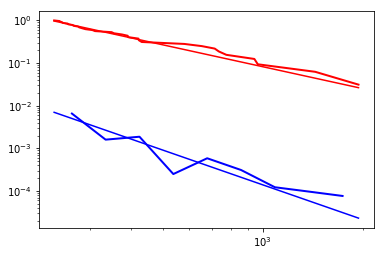

In [15]:
fig1 = fit.plot_pdf(color = "b", linewidth =2)
fit.power_law.plot_pdf(color = "b", linestyle = "-", ax = fig1)
fit.plot_ccdf(color = "r", linewidth = 2, ax= fig1)
fit.power_law.plot_ccdf(color = "r", linestyle = "-", ax = fig1)

The package contains three different functions for analysing and visualizing the distribution of a dataset. 
The first is the probability density function (PDF) which is a good choice if there are peaks in the tail of the distribution. For the PDF you need to think about the spacing of the bins. The default behaviour is logarithmic binning. With the linear_bins=True parameter you can change it to linear binning. This is not required for the cumulative distribution function (CDF, $p(X>x)$) and the complementary cumulative distribution also known as the survival function (CCDF, $p(X \ge x)$). CCDF is the preferred way of visualizing a heavy-tailed distributions.

You can get access to the raw sorted data with .cdf() and for the bin_edges with .pdf() when you use them on a Fit object.

In [59]:
x, y = fit.cdf()
bin_edges, probability= fit.pdf()

For the Distribution object you can access either all probabilities for the given dataset or you can set a range for the given dataset 

In [60]:
y = fit.lognormal.cdf(data = [300, 350])
y = fit.lognormal.pdf()

## Localize the tail of the distribution manually
<a name="localize"></a>

The most interesting part of a distribution is mostly the tail and the properties, so if you want to test the distributions on a heavy tailed tail you might consider to set an $x_{min}$ from where you analyze the distribution. You can set this value by yourself or you can make the package to find the optimal value by itself. This happens when you create the fit object without setting a $x_{min}$ value.

In [18]:
fit = powerlaw.Fit(simulated_data)

Calculating best minimal value for power law fit
C:\Users\Andreas\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [19]:
fit.xmin

5.001209484872008

In [20]:
fit.fixed_xmin

False

In [22]:
fit = powerlaw.Fit(simulated_data, xmin =1.0)

In [23]:
fit.xmin

1.0

In [24]:
fit.fixed_xmin

True

So as you can see you can set the $x_{min}$ value by yourself or you can let the algorithm search for the optimal $x_{min}$ to create the Fit object. If you are uncertain about the exact $x_{min}$ value within a range of values you can also set a range in which the powerlaw should search for the optimal $x_{min}$ value.

In [25]:
fit = powerlaw.Fit(simulated_data, xmin =(250.0, 300.0))

Calculating best minimal value for power law fit
C:\Users\Andreas\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [26]:
fit.xmin

256.4085304453929

If you let the package find the optimal $x_{min}$ value by itself you should know that by default the package uses the Kolmogorov-Smirnov distance D to minimize the distance between the empirical data and the powerlaw. You can also use different metrics with the parameter xmin_distance. Other options in this package are the Kuiper distance V and the Anderson-Darling distance $A^2$, which both give additional weigths to the tails. While the Kuiper Distance has pretty similar results compared to the Kolmogorov-Smirnov distance the Anderson-Darling distance is a more conservative approach and there might occur the issue that it cuts out to much data for a good fit. This is a problem for smaller datasets in particular. 

In [28]:
fit = powerlaw.Fit(simulated_data, xmin_distance="D")
fit = powerlaw.Fit(simulated_data, xmin_distance="V")
fit = powerlaw.Fit(simulated_data, xmin_distance="Asquare")

Calculating best minimal value for power law fit
C:\Users\Andreas\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


It might also be the case that you have a theoretical limit or you just want to analyze just a subsection of a larger system from the observation data. For this you can also set a $x_{max}$ value. To set a good value for $x_{max}$ you need to know about the nature and the context of the data and so you have to set it by yourself. There is no optimal fit that can be calculated automatically.

In [25]:
fit = powerlaw.Fit(simulated_data, xmax = 1000)

Calculating best minimal value for power law fit


If you have set $x_{max}$ and $x_{min}$ which is done anyways you still want to plot the whole dataset you can use the parameter original_data and set it to "True" in the plotting function parameter. If you want to set $x_{max}$ you have to keep in mind that CDF and CCDF powerlaws will bend down rather quickly when it gets closer to the $x_{max}$ value. So if you want to visualize the powerlaw a PDF might be the better option.

If you create a Fit Object with your dataset the default assumption of the object is that it is a continous dataset. If your dataset is discret you can also set the discrete parameter on "True".

In [24]:
fit_discret = powerlaw.Fit(simulated_data, xmin =230.0, discrete= True)

Not enough data. Returning nan
Not enough data. Returning nan


## Compare different Fit Object distribution
<a name="compare"></a>

To check which distribution fits best for the given dataset you can use the "distribution_compare" function. This function allows you to compare two distributions for the used Fit object. The function has two output parameters. You get R as the loglikelihood ratio between the two distributions you want to compare. If R is a positive value it means that the first distribution seems to fit better and if it is negative the second distribution seems to fit better. The second parameter p describes the significance value. If you want to normalize the R value you can set the "normalized_ratio" parameter on true.

In [26]:
R, p = fit.distribution_compare("power_law", "exponential",normalized_ratio = True)

So as you can see below the powerlaw distribution fits better to the simulated data set.

In [27]:
R,p

(2.244773569033939, 0.024782672374514158)

If you want to compare the likelihood of two distributions that are nested versions of each other it requires particular calculations for the resulting p-value. The function is able to assume if the two distributions are nested based on the name of the distribution, but you can also set the nested parameter as you can see below.

In [32]:
fit.distribution_compare('power_law', 'truncated_power_law')

Assuming nested distributions


(-0.29060822039152256, 0.44583590962101216)

As you can see below if you compare two distributions that are no nested version of each other the p-value differs dependant on the nested parameter.

In [33]:
fit.distribution_compare('power_law', 'exponential', nested=False)

(44.63980953550745, 0.0013792434476565384)

In [34]:
fit.distribution_compare('power_law', 'exponential', nested=True)

(44.63980953550745, 0.0)

## Setting up requirements 
<a name="requirements"></a>

If you search for an optimal $\alpha$ value you can set a value for the "sigma_threshold" parameter, so that the $\alpha$ value gets restricted by it's $\sigma$.

In [36]:
fit = powerlaw.Fit(simulated_data)
fit.power_law.alpha, fit.power_law.sigma, fit.xmin

Calculating best minimal value for power law fit
C:\Users\Andreas\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(2.5089670921430276, 0.015094199860831367, 5.001209484872008)

In [37]:
fit = powerlaw.Fit(simulated_data, sigma_threshold = .1)
fit.power_law.alpha, fit.power_law.sigma, fit.xmin

Calculating best minimal value for power law fit


(2.5089670921430276, 0.015094199860831367, 5.001209484872008)

You can also restrict the distribution by parameter ranges for multiple parameters like $\alpha$ and $\sigma$. You can set up a dictionary with the a tupel for the range like the following. You can see that both restrictions have been fullfilled.

In [38]:
parameter_range = {"alpha": [2.3, None], "sigma": [None, .2], "xmin": [None, 480.0]}
fit=powerlaw.Fit(simulated_data, parameter_range=parameter_range)
fit.power_law.alpha, fit.power_law.sigma, fit.xmin

Calculating best minimal value for power law fit
C:\Users\Andreas\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(2.5089670921430276, 0.015094199860831367, 5.001209484872008)

A problem of setting a sigma threshold might occur because of the way $x_{min}$ gets selected. To get the $x_{min}$ the algorithm searches for the value with the lowest Kolmogorov-Smirnov distances (if you haven't changed that with the xmin_distance parameter). There might be multiple local minima but $\sigma$ increases monotonically throught the range of $x_{min}$. That means if you set a treshold a better $x_{min}$ value might not be considered. 

If you set multiple requirements for the Fit object like a sigma_threshold you might get the problem, that there are no valid fits for the data with your requirments. To bypass this the noise_flag parameter will be set to True automatically and will ignore the requirements to find the best $x_{min}$ for example. As you can the below the functions output is "No valid fits found", but in the cell below you can see the best fitting parameters.

In [43]:
fit =powerlaw.Fit(simulated_data, sigma_threshold = .001)

Calculating best minimal value for power law fit
C:\Users\Andreas\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
No valid fits found.


In [44]:
fit.power_law.alpha, fit.power_law.sigma, fit.xmin, fit.noise_flag

(2.5089670921430276, 0.015094199860831367, 5.001209484872008, True)

If you have a dataset with partly correlated data points you have the problem that it can affect the quality of the maximum likelihood. To avoid this you can manually filter the correlated data points out of the data or you can switch from a maximum likelihood estimation to a minimum distance estimation. You can do this by using the parameter fit_method and the parameter "KS" which stands for the Kolmogorov-Smirnov distance. This will avoid impact on the maximum likelihood, but it does not solve the problem that the loglikelihood tests of the compare_distribution function are still affected by correlated data points.